In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = pickle.load(open(r'/content/drive/MyDrive/pkl files/XlowQ.pkl','rb'))
y = pickle.load(open(r'/content/drive/MyDrive/pkl files/ylowQ.pkl','rb'))

In [4]:
X
#contains all the values for the images in the data set

array([[[[ 10,  57, 174],
         [  6,  41, 146],
         [ 31,  32, 101],
         ...,
         [144, 156, 156],
         [ 35,  41,  48],
         [ 14,  28,  26]],

        [[ 10,  29, 112],
         [  1,  12,  87],
         [  3,   4,  55],
         ...,
         [141, 153, 153],
         [ 37,  43,  50],
         [ 17,  31,  29]],

        [[  2,  20,  61],
         [ 35,  54,  92],
         [ 69,  86, 119],
         ...,
         [147, 159, 159],
         [ 58,  64,  71],
         [ 15,  29,  27]],

        ...,

        [[ 65,  97, 138],
         [ 70,  99, 138],
         [ 65,  89, 125],
         ...,
         [ 91, 117, 131],
         [ 86, 112, 126],
         [103, 125, 136]],

        [[ 54,  86, 127],
         [ 68,  97, 136],
         [ 88, 112, 148],
         ...,
         [ 81, 104, 119],
         [ 85, 113, 127],
         [ 95, 121, 135]],

        [[ 36,  69, 114],
         [ 46,  76, 118],
         [ 72,  98, 135],
         ...,
         [ 78,  99, 114],
        

In [5]:
y
#contains the coresponding label to each image(0 represents a cat and 1 represent a dog)

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [6]:
X = X/255 
#feature scalind (lesser the value faster the calculation)

In [7]:
X.shape
#contains 24946 images of pixels 200 x 200 and 3 RGB channels

(24946, 100, 100, 3)

In [8]:
testX = X[0:10000]
testX.shape
testy = y[0:10000]
testy.shape

(10000,)

In [9]:
# pip install --upgrade keras
# pip install tensorflow numpy scipy keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = testX.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(testX,testy,epochs = 10, validation_split = 0.1 ,batch_size = 32)

Epoch 1/10
282/282 [==============================] - 19s 18ms/step - loss: 0.6898 - accuracy: 0.5656 - val_loss: 0.6372 - val_accuracy: 0.6720
Epoch 2/10
282/282 [==============================] - 5s 18ms/step - loss: 0.6250 - accuracy: 0.6557 - val_loss: 0.5803 - val_accuracy: 0.7180
Epoch 3/10
282/282 [==============================] - 4s 15ms/step - loss: 0.5436 - accuracy: 0.7219 - val_loss: 0.5432 - val_accuracy: 0.7330
Epoch 4/10
282/282 [==============================] - 4s 15ms/step - loss: 0.4355 - accuracy: 0.7952 - val_loss: 0.5953 - val_accuracy: 0.7370
Epoch 5/10
282/282 [==============================] - 4s 16ms/step - loss: 0.2994 - accuracy: 0.8757 - val_loss: 0.6726 - val_accuracy: 0.7470
Epoch 6/10
282/282 [==============================] - 4s 15ms/step - loss: 0.1457 - accuracy: 0.9427 - val_loss: 0.8904 - val_accuracy: 0.7310
Epoch 7/10
282/282 [==============================] - 4s 15ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 1.2632 - val_accuracy: 0.714

In [15]:
pickle.dump(model,open('/content/drive/MyDrive/pkl files/model.pkl','wb'))

In [16]:
model.save('/content/drive/MyDrive/pkl files/my_model.keras')

## Testing using test dataset

In [20]:
import matplotlib.pyplot as plt

(100, 100, 3)

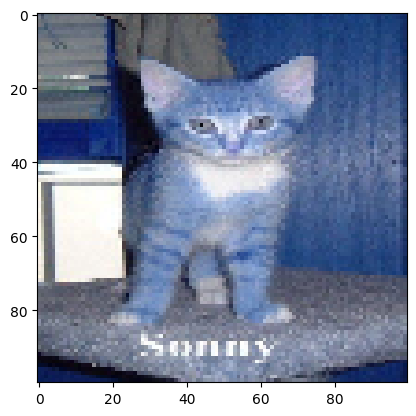

In [32]:
img = X[21005]
plt.imshow(img)
img.shape

In [33]:
pred = model.predict(img.reshape(1,100,100,3))
print("Probability Cat: ", pred[0,0])
print("Probability Dod: ", pred[0,1])
if(pred[0,0]> pred[0,1]):
  result = 'Cat'
else:
  result = 'Dog'  

print("The model says its a : ", result)

1/1 [==============================] - 0s 18ms/step
Probability Cat:  0.9999994
Probability Dod:  6.098508e-07
The model says its a :  Cat


## Testing using a random google image

In [35]:
import cv2

In [60]:
randomImg = cv2.imread('/content/drive/MyDrive/pkl files/Test images/Test3.JPG')

(3024, 4032, 3)

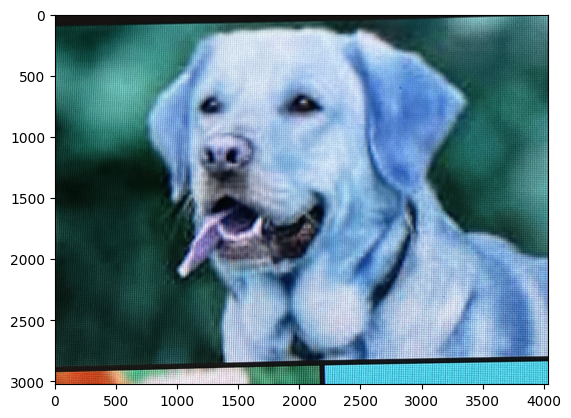

In [61]:
plt.imshow(randomImg)
randomImg.shape
# before resizing and preprocessing the test image

In [62]:
randomImgR = cv2.resize(randomImg, (100,100))
randomImgR = randomImgR.reshape(1,100,100,3)


In [64]:
pred = model.predict(randomImgR)
print(pred)
print("Probability Cat: ", pred[0,0])
print("Probability Dod: ", pred[0,1])
if(pred[0,0]> pred[0,1]):
  result = 'Cat'
else:
  result = 'Dog'  

print("The model says its a : ", result)

1/1 [==============================] - 0s 25ms/step
[[0. 1.]]
Probability Cat:  0.0
Probability Dod:  1.0
The model says its a :  Dog
